In [1]:
from nilearn import plotting, connectome
import numpy as np
import math
import pickle
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
with open("time_series.pkl", "rb") as f:
    data = pickle.load(f)

In [7]:
window_length_Second = None
window_length_TR = 22
slidingSteps = 1
ks = list(range(2, 25))

In [4]:
time_series = data["sub-292"]["ses-preop"]["run-01"]["time_series"]
TR = data["sub-292"]["ses-preop"]["run-01"]["TR"]

In [5]:
def sliceWindows(time_series, frame, interval):
    windows = []
    l, r = 0, frame
    while r < time_series.shape[0]:
        windows.append(time_series[l:r])
        l += interval
        r = l + frame
    return windows


165
(165, 116, 116)
(116, 116)
164
(164, 116, 116)
(116, 116)
163
(163, 116, 116)
(116, 116)
162
(162, 116, 116)
(116, 116)
161
(161, 116, 116)
(116, 116)
160
(160, 116, 116)
(116, 116)
159
(159, 116, 116)
(116, 116)
158
(158, 116, 116)
(116, 116)
157
(157, 116, 116)
(116, 116)
156
(156, 116, 116)
(116, 116)
155
(155, 116, 116)
(116, 116)


C:\Users\fjj\AppData\Local\Temp\ipykernel_16364\2181746211.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_fc, ax_fc = plt.subplots()


154
(154, 116, 116)
(116, 116)
153
(153, 116, 116)
(116, 116)
152
(152, 116, 116)
(116, 116)
151
(151, 116, 116)
(116, 116)
150
(150, 116, 116)
(116, 116)
149
(149, 116, 116)
(116, 116)
148
(148, 116, 116)
(116, 116)
147
(147, 116, 116)
(116, 116)
146
(146, 116, 116)
(116, 116)
145
(145, 116, 116)
(116, 116)
144
(144, 116, 116)
(116, 116)
143
(143, 116, 116)
(116, 116)
142
(142, 116, 116)
(116, 116)
141
(141, 116, 116)
(116, 116)
140
(140, 116, 116)
(116, 116)
139
(139, 116, 116)
(116, 116)
138
(138, 116, 116)
(116, 116)
137
(137, 116, 116)
(116, 116)
136
(136, 116, 116)
(116, 116)
135
(135, 116, 116)
(116, 116)
134
(134, 116, 116)
(116, 116)
133
(133, 116, 116)
(116, 116)
132
(132, 116, 116)
(116, 116)
131
(131, 116, 116)
(116, 116)


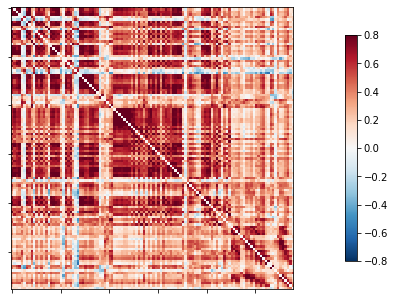

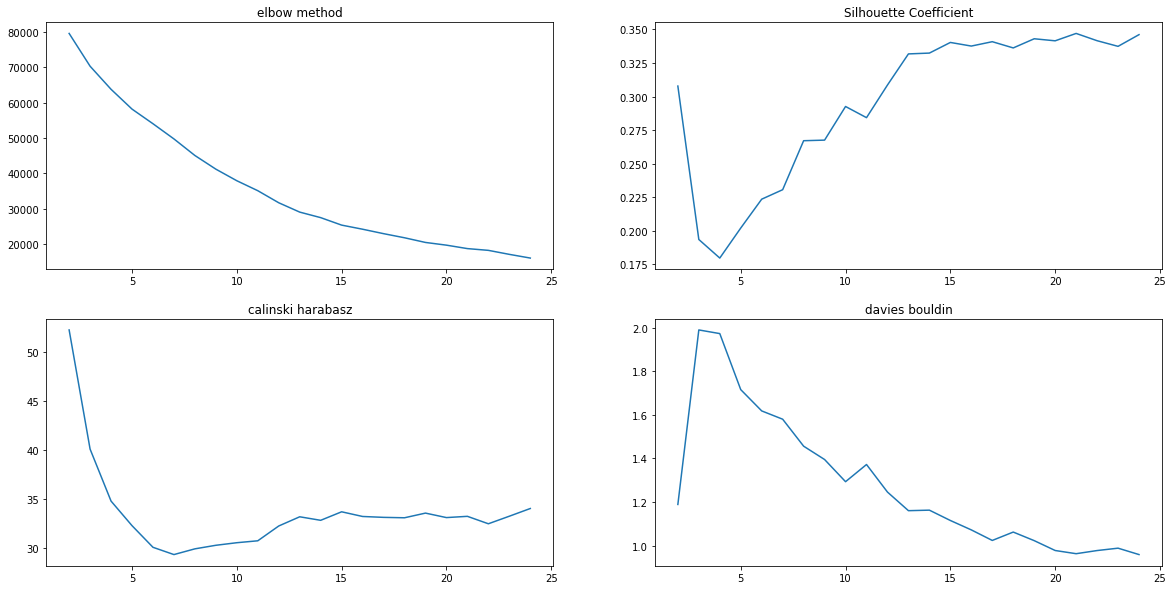

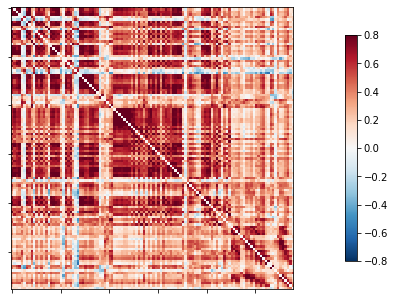

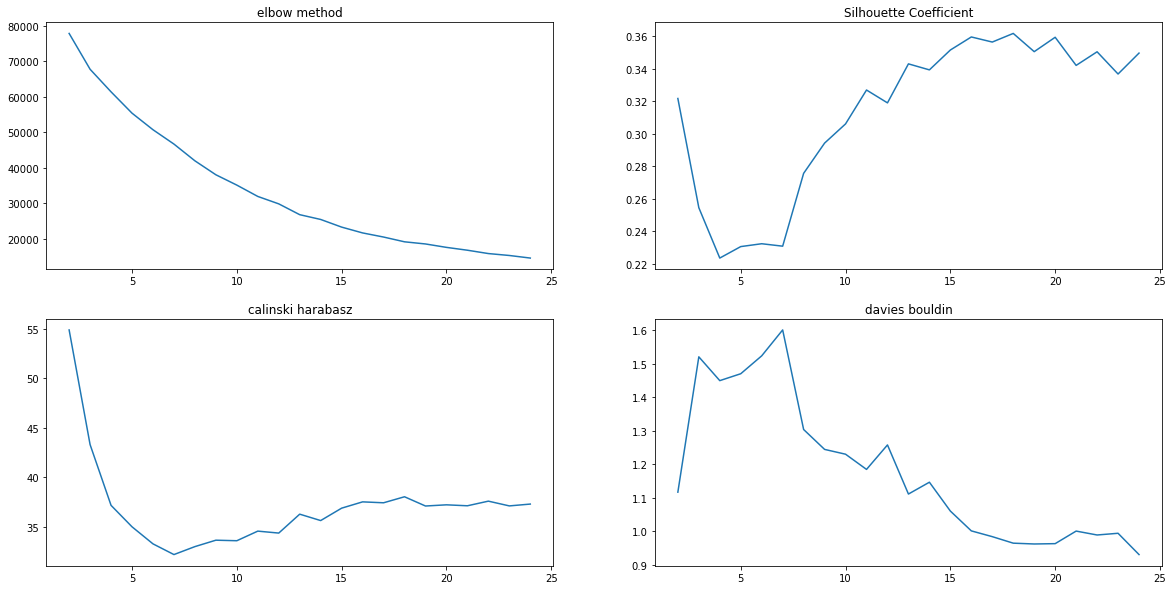

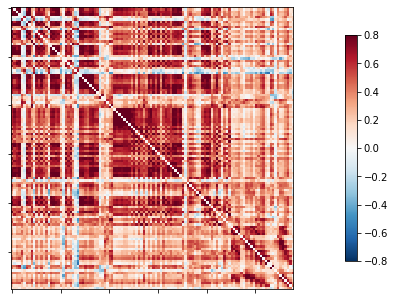

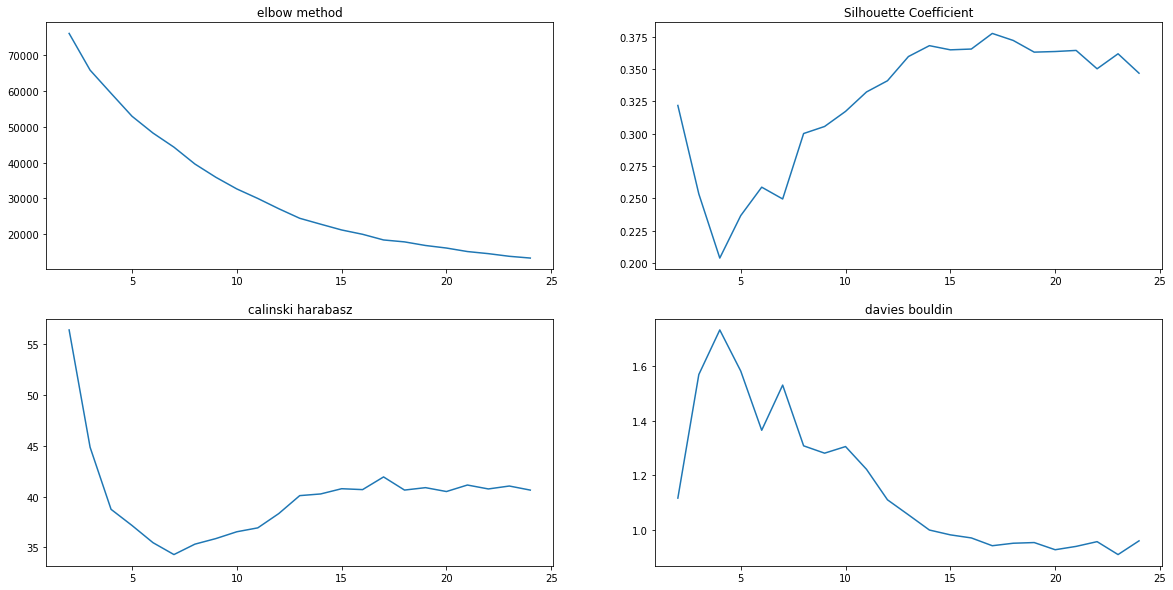

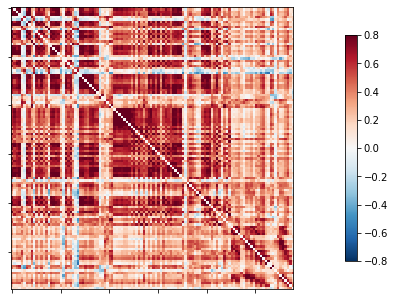

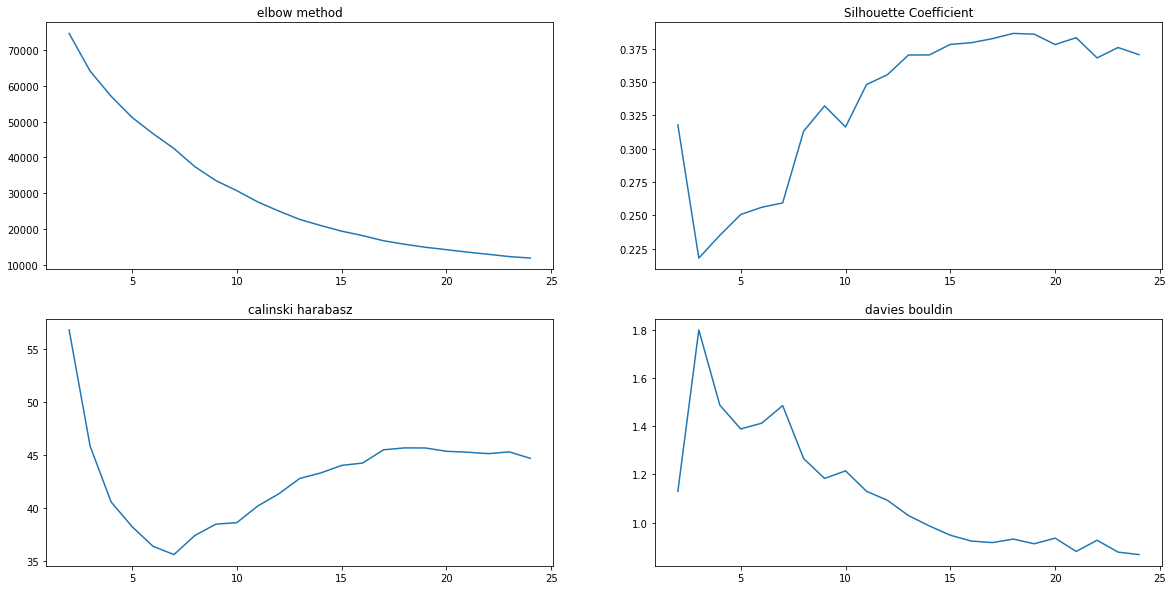

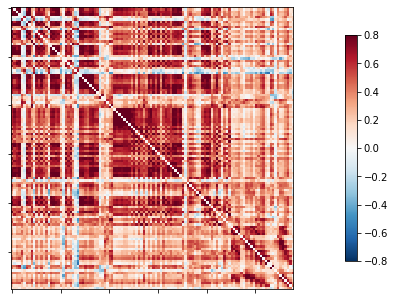

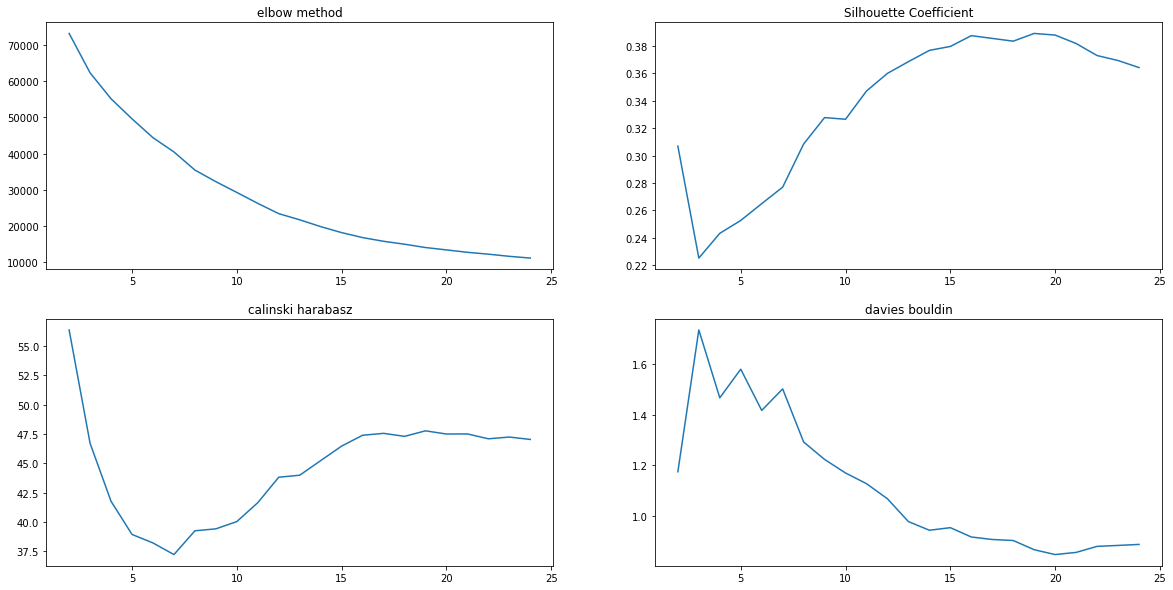

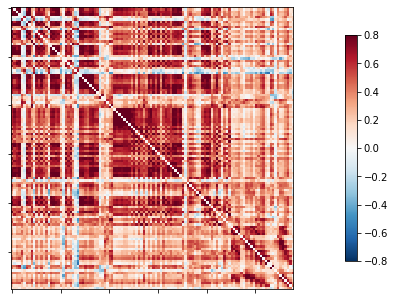

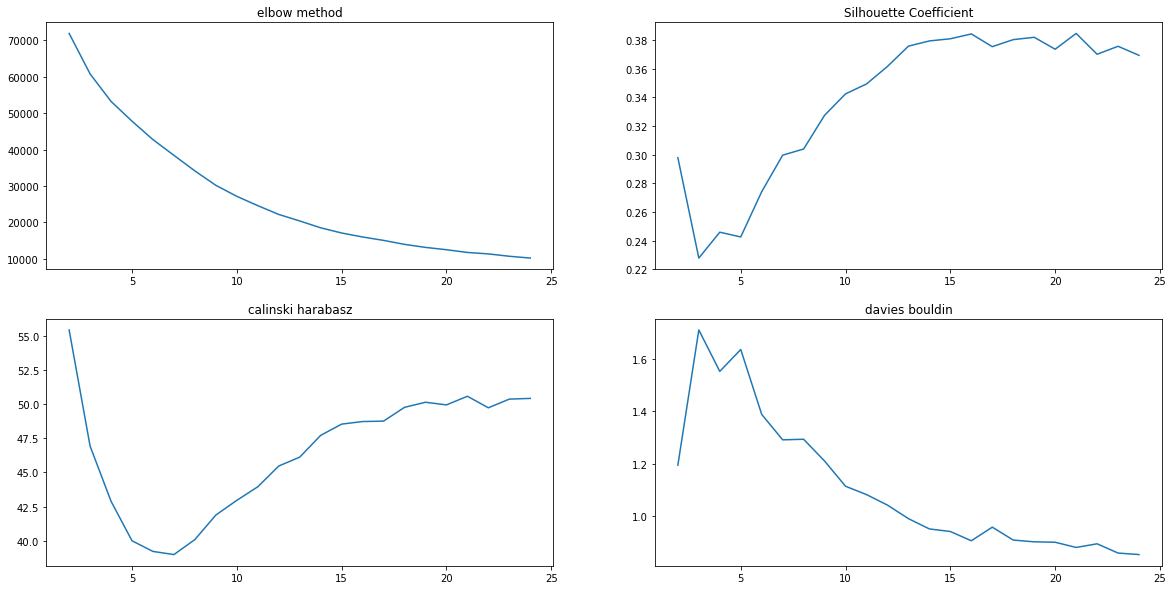

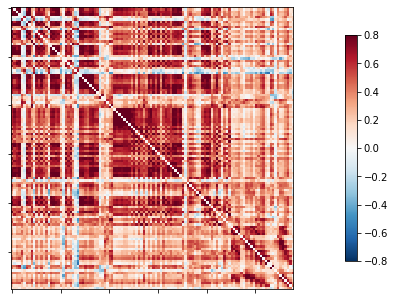

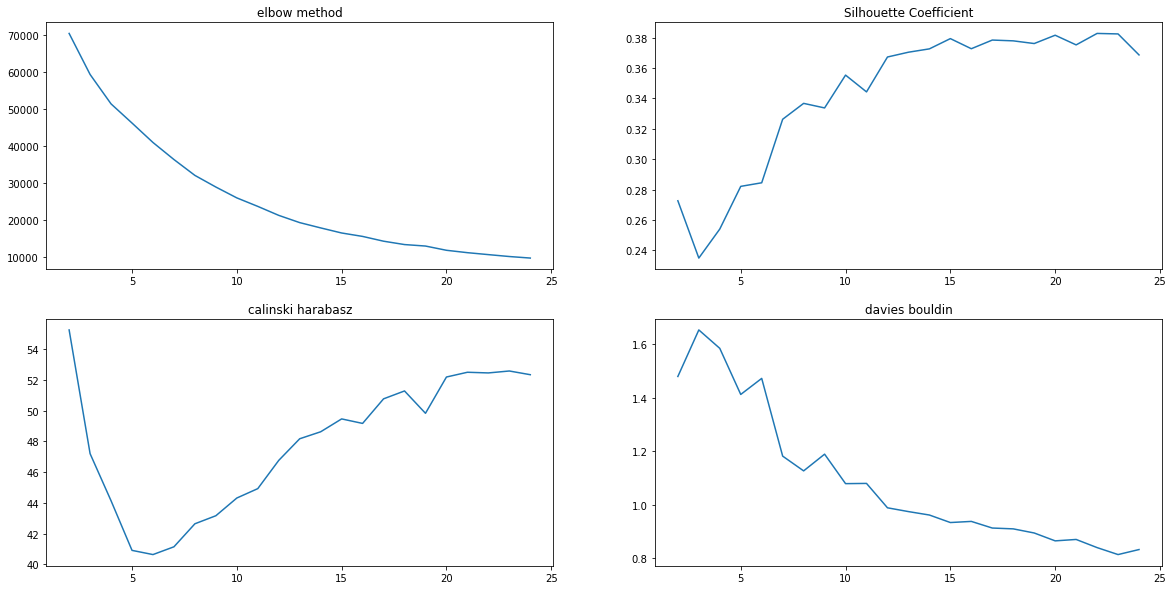

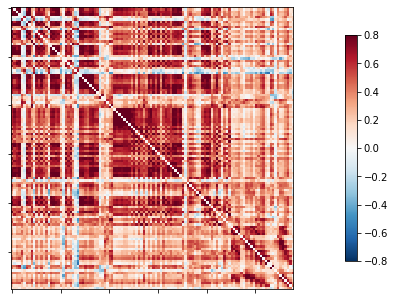

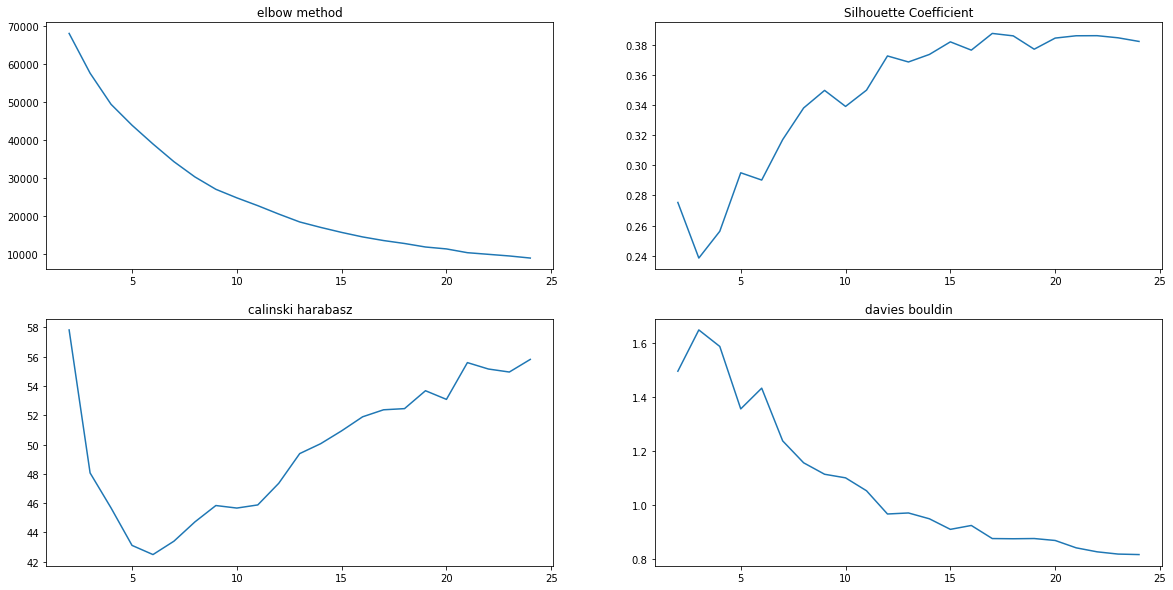

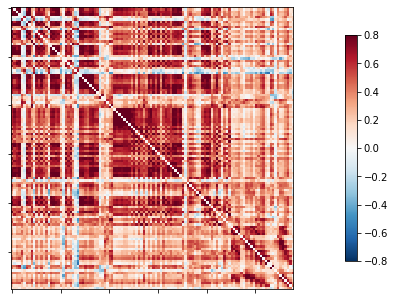

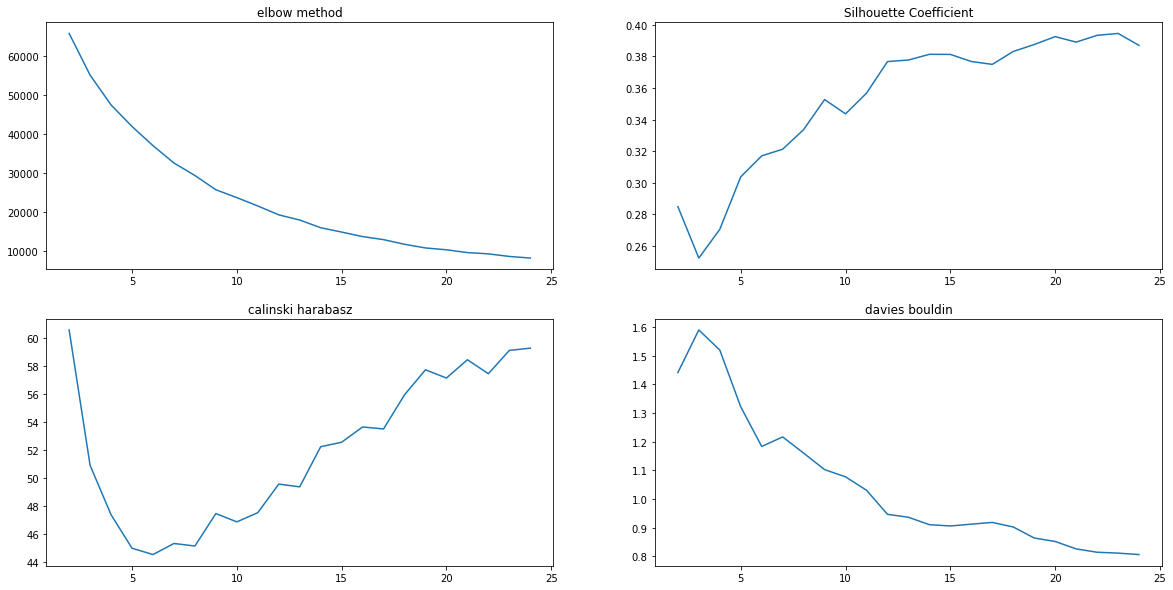

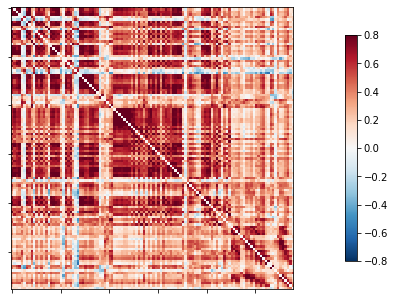

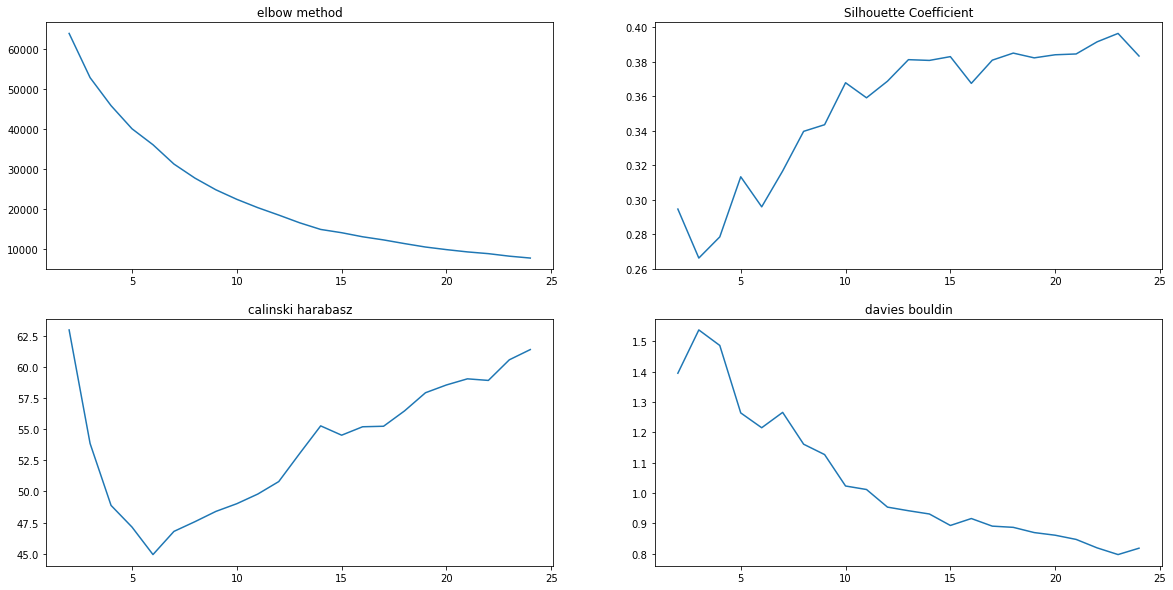

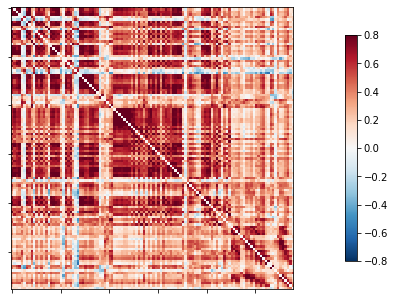

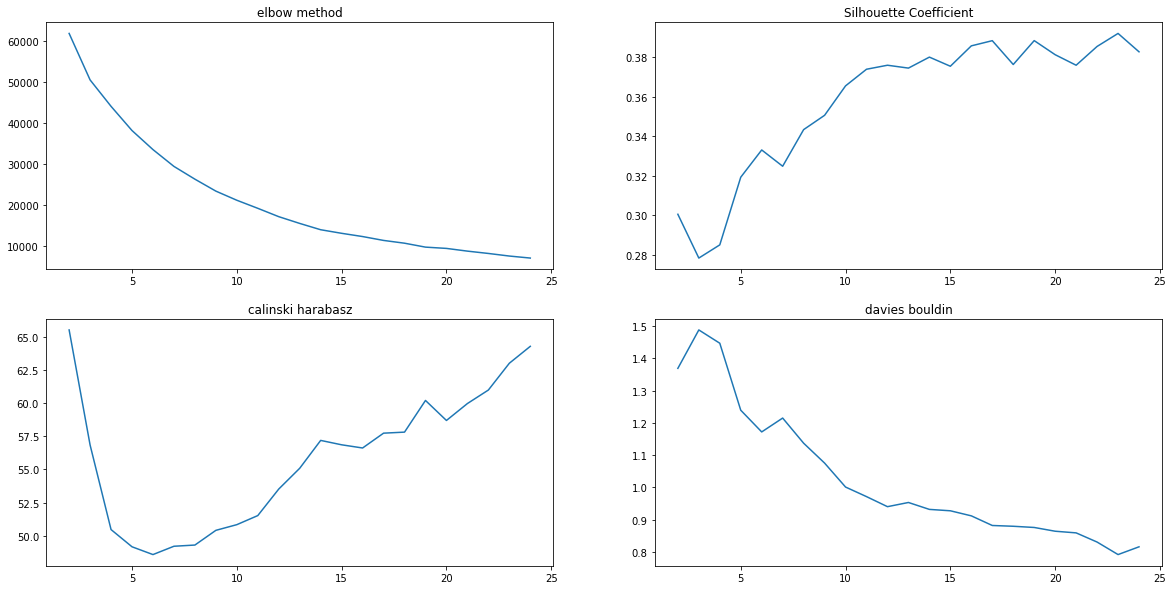

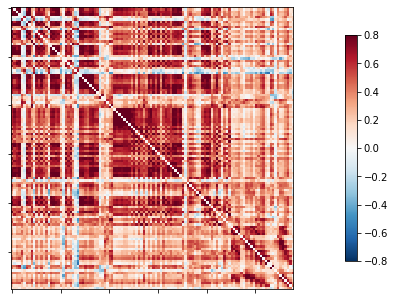

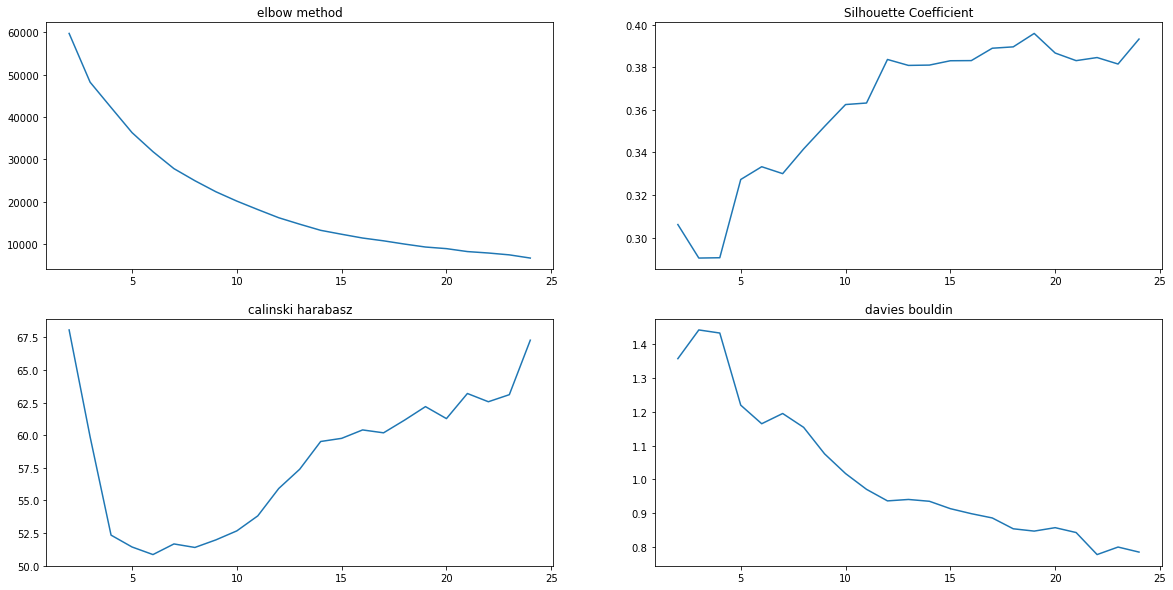

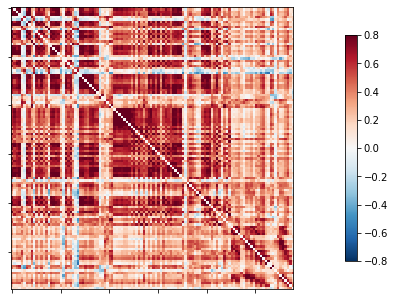

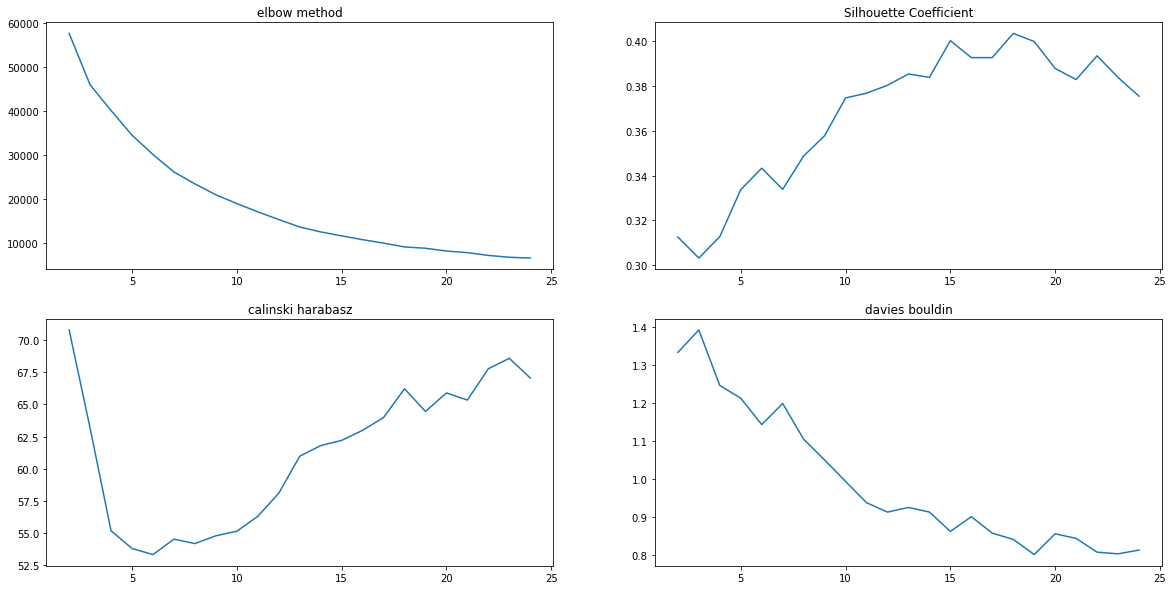

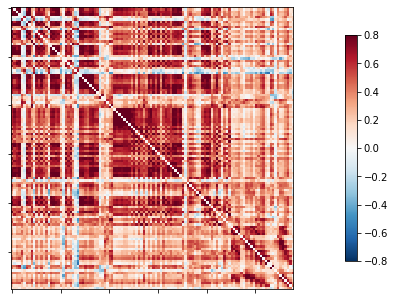

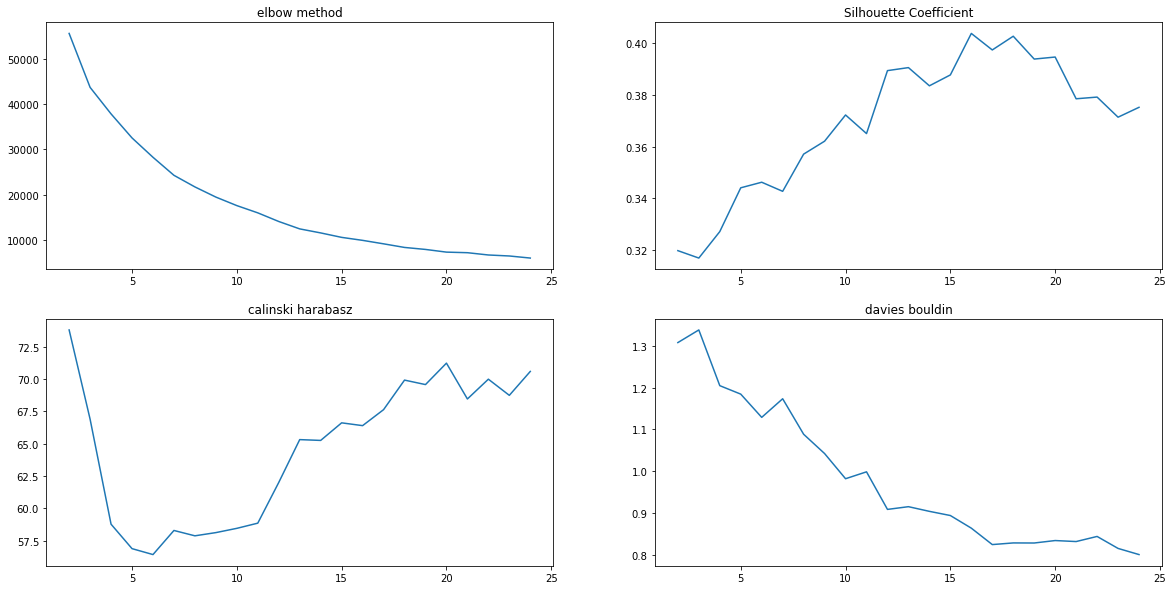

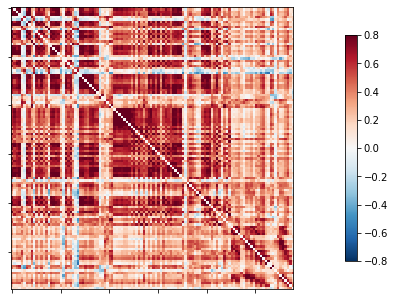

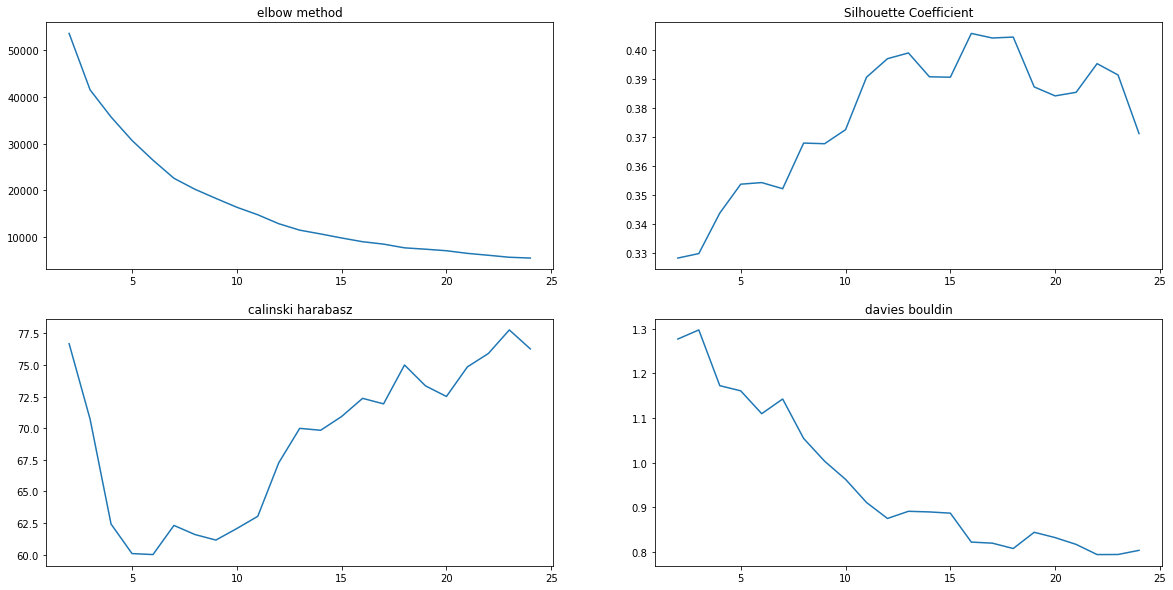

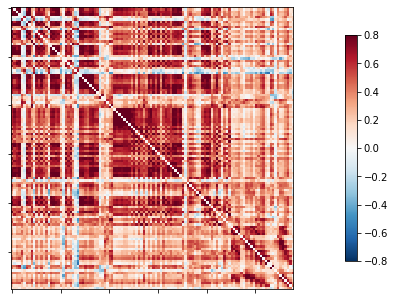

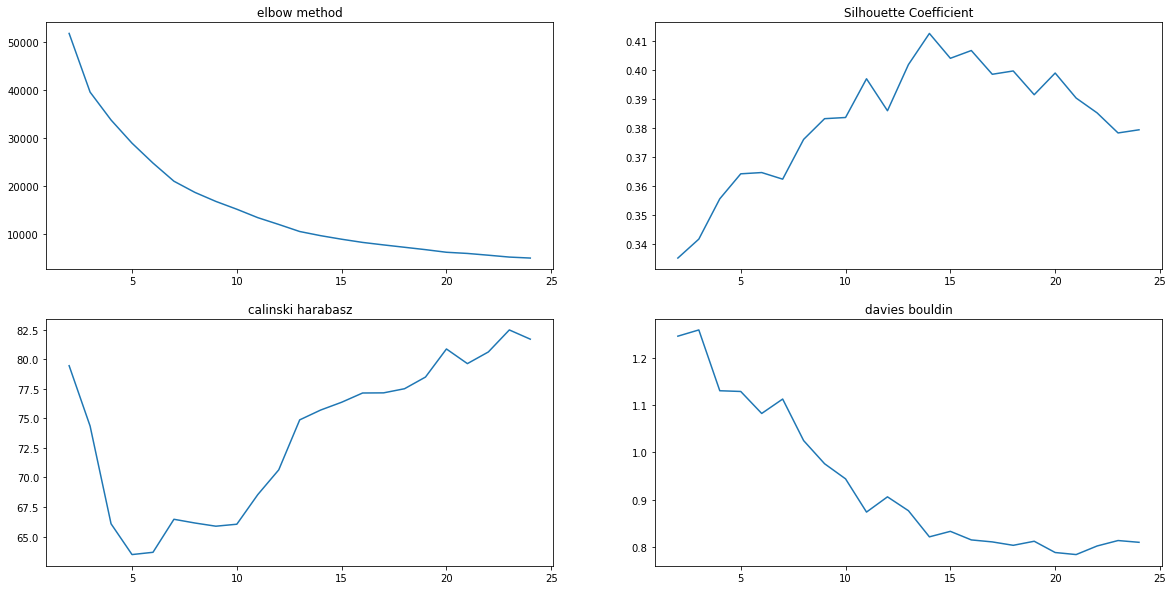

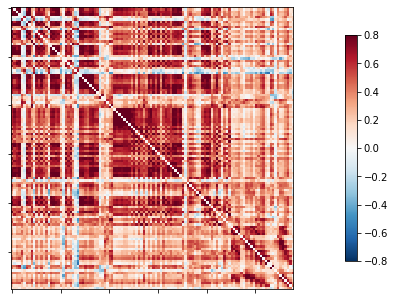

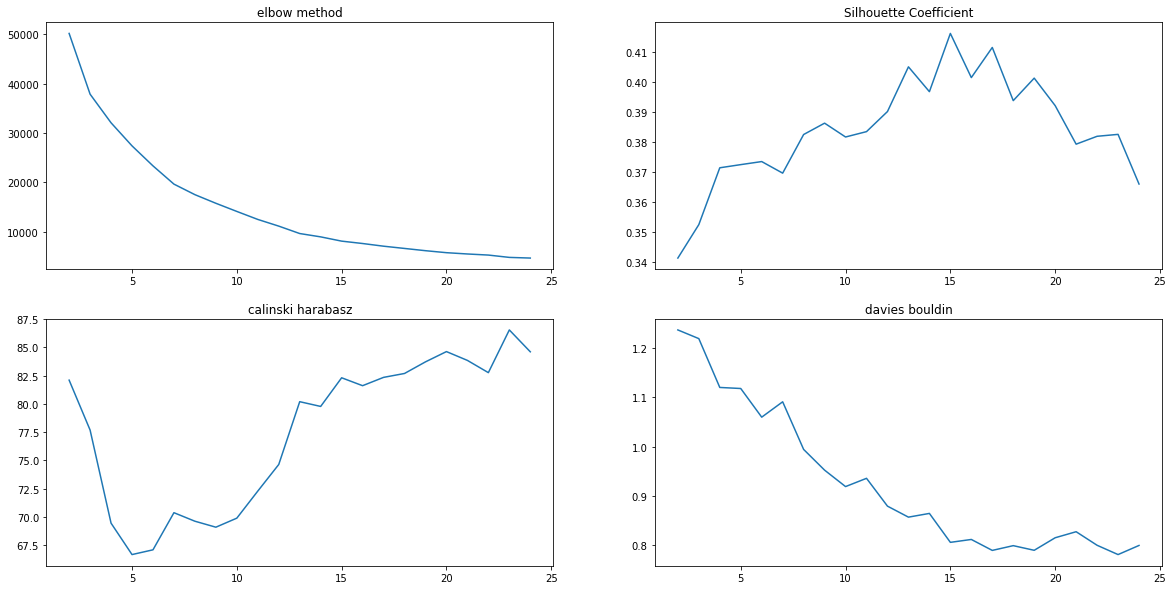

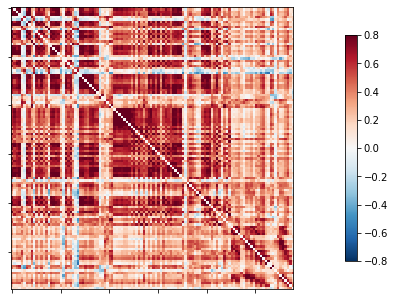

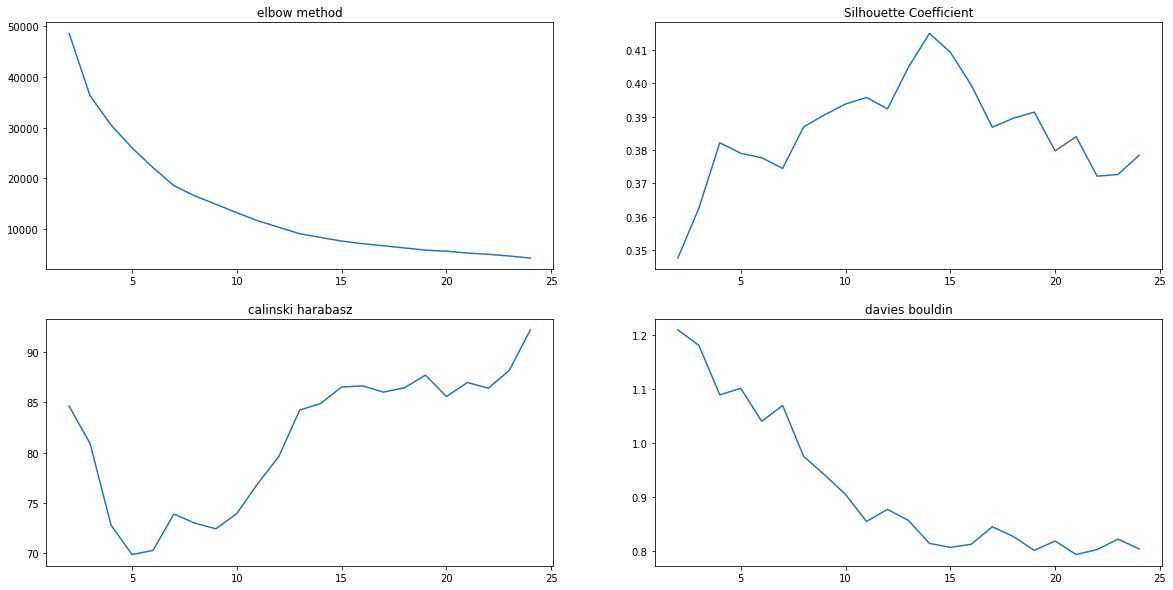

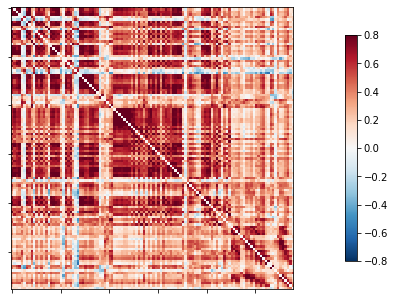

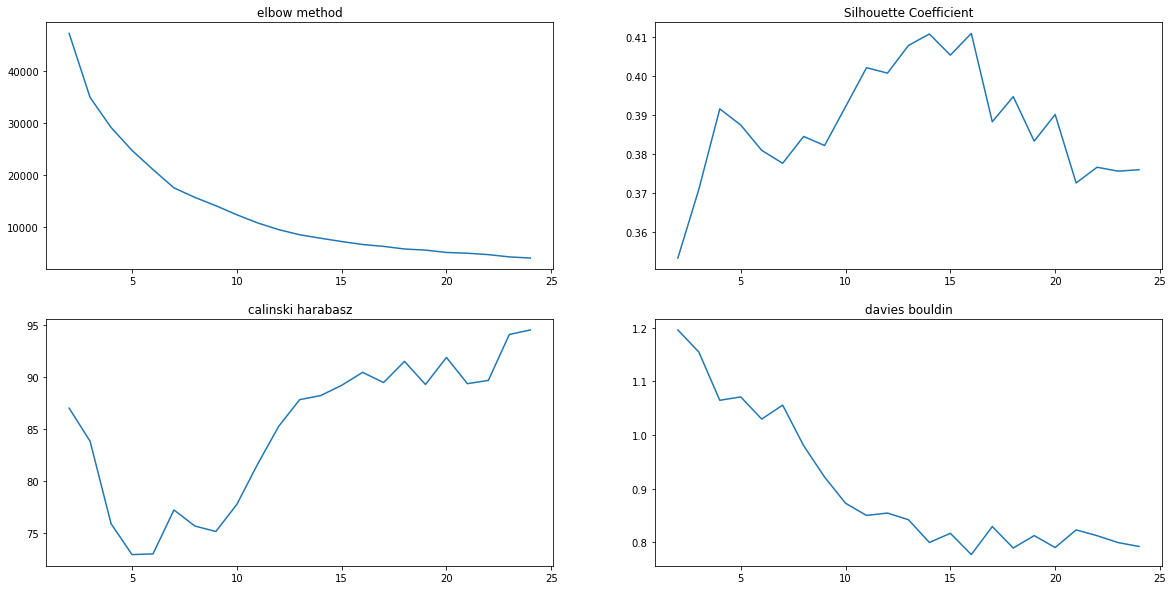

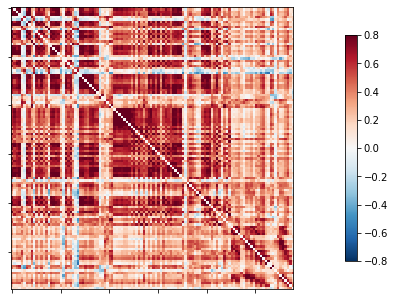

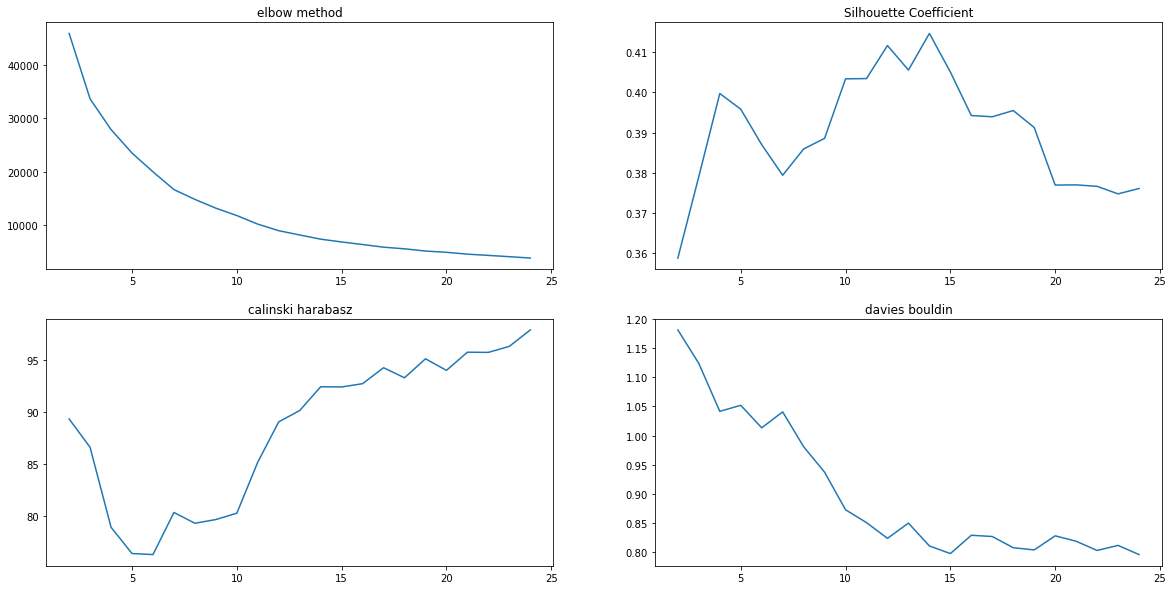

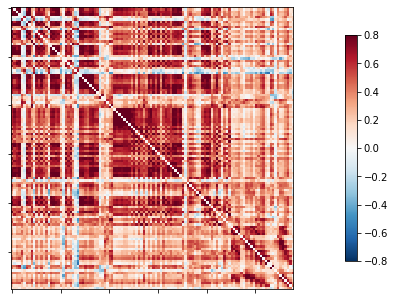

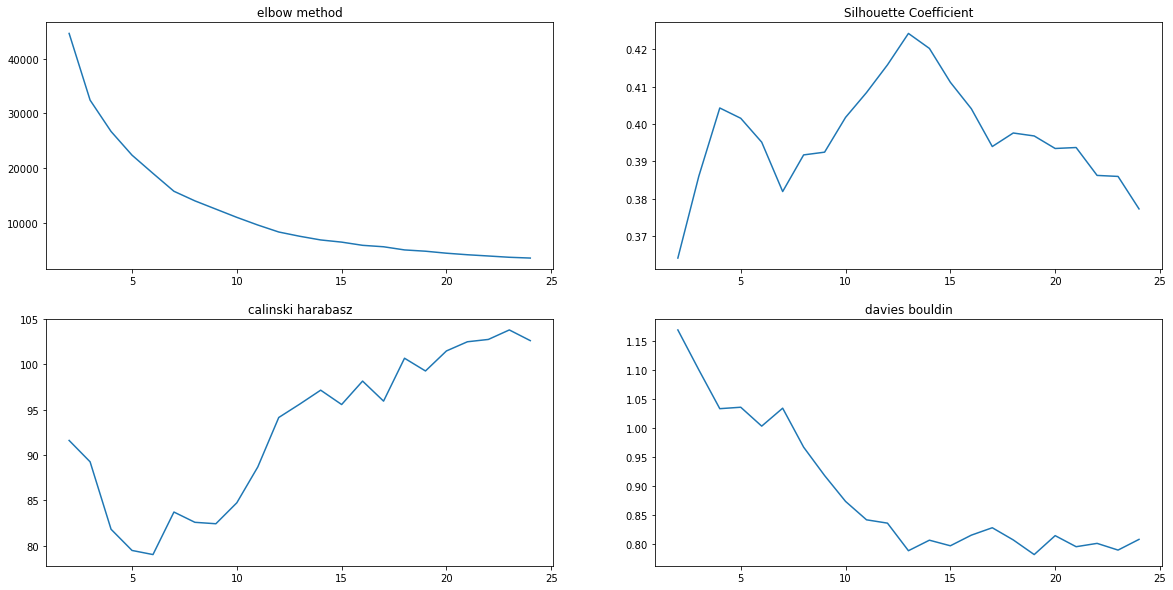

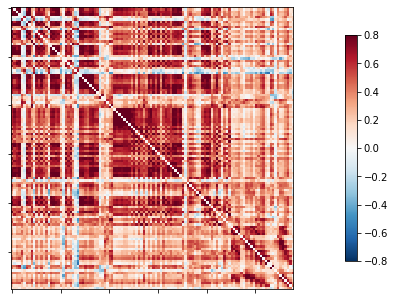

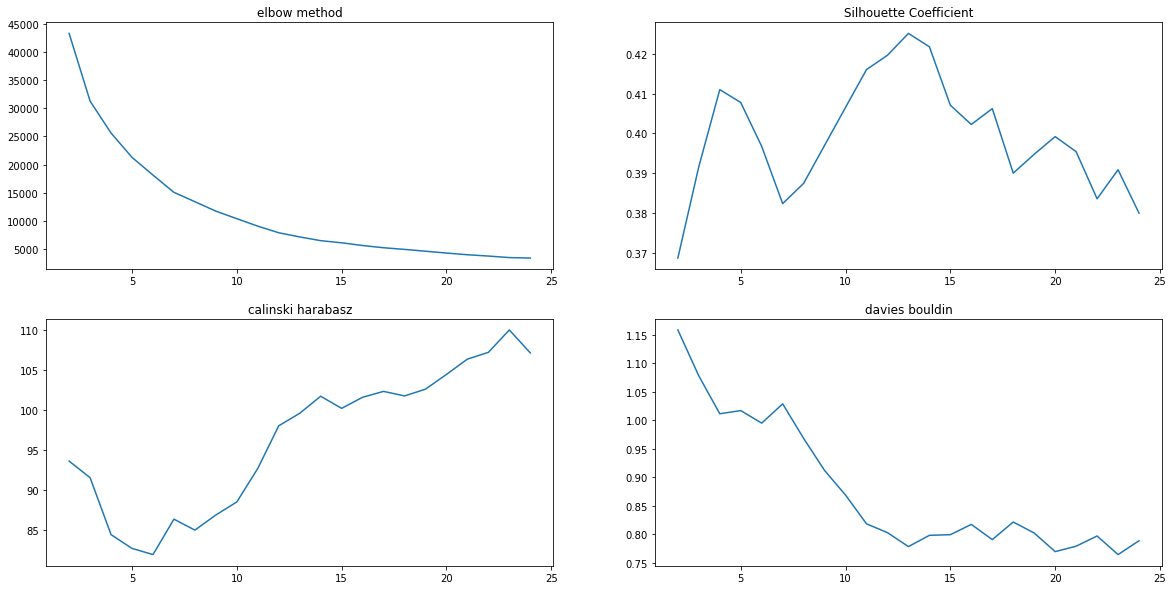

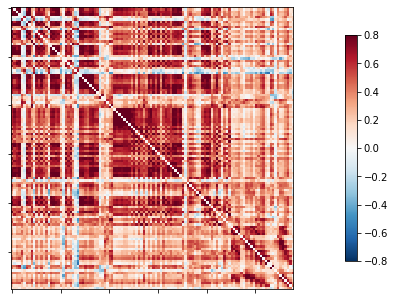

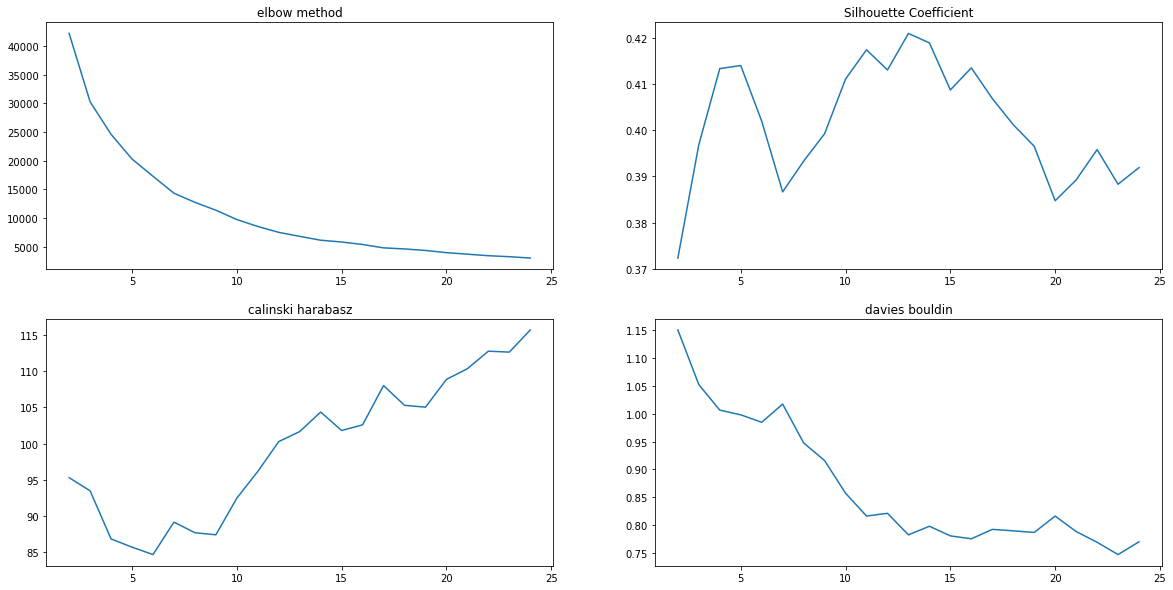

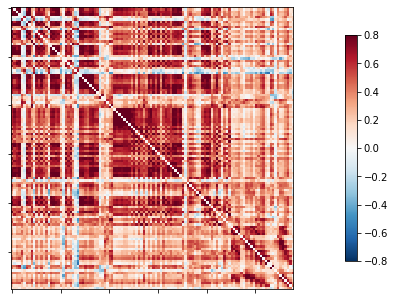

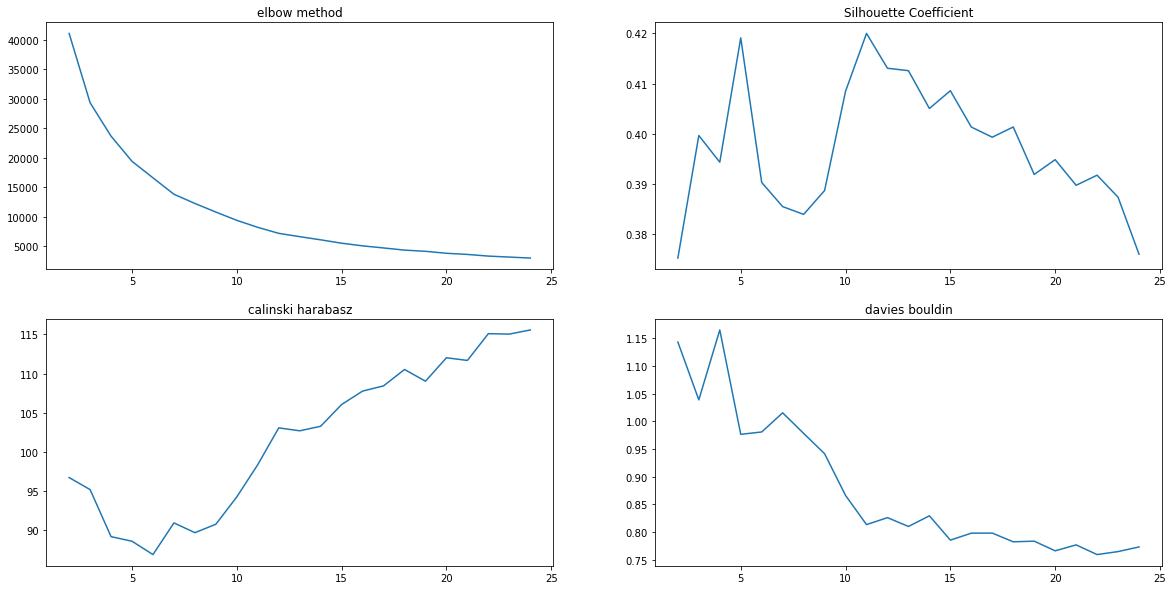

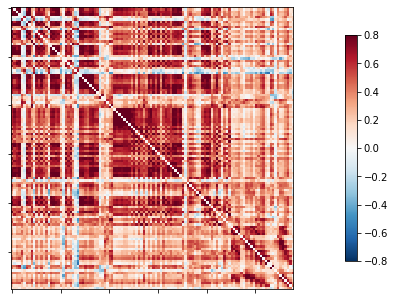

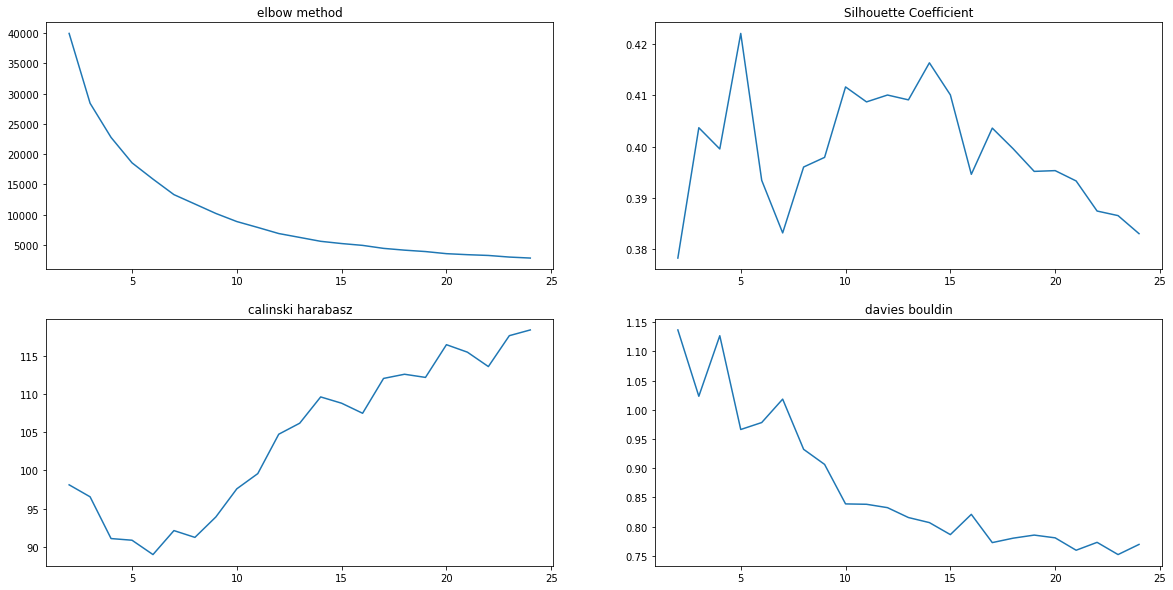

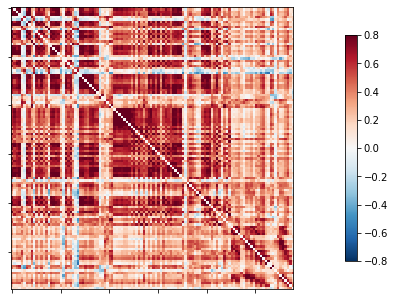

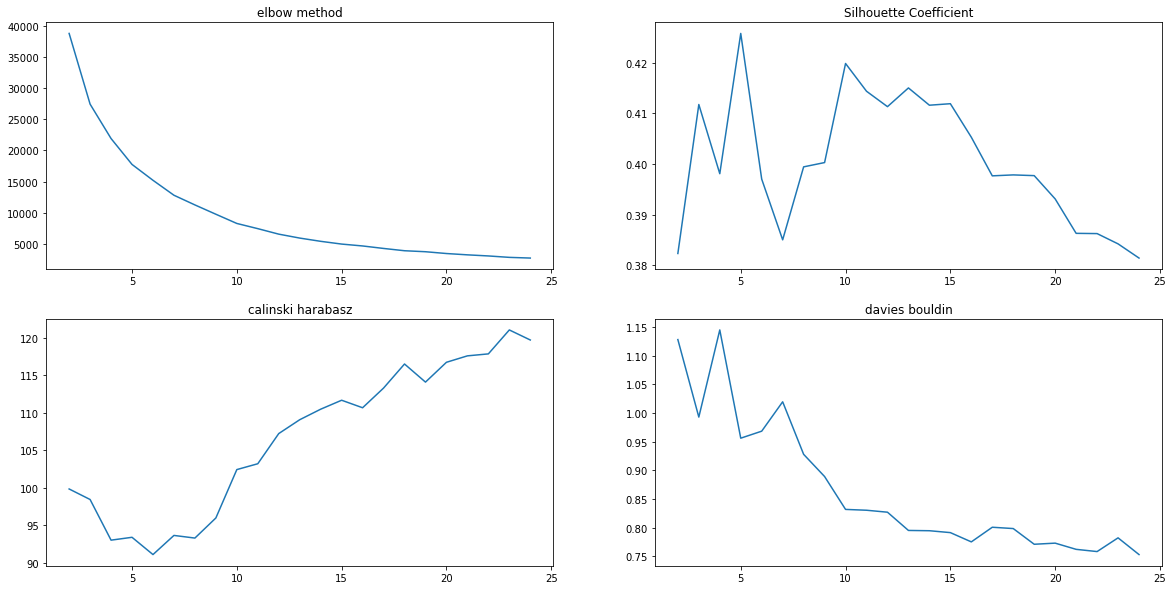

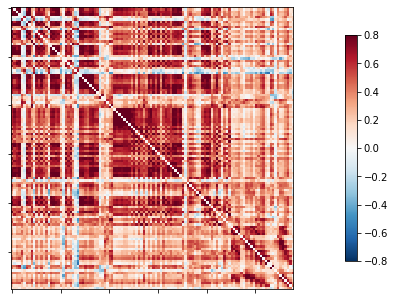

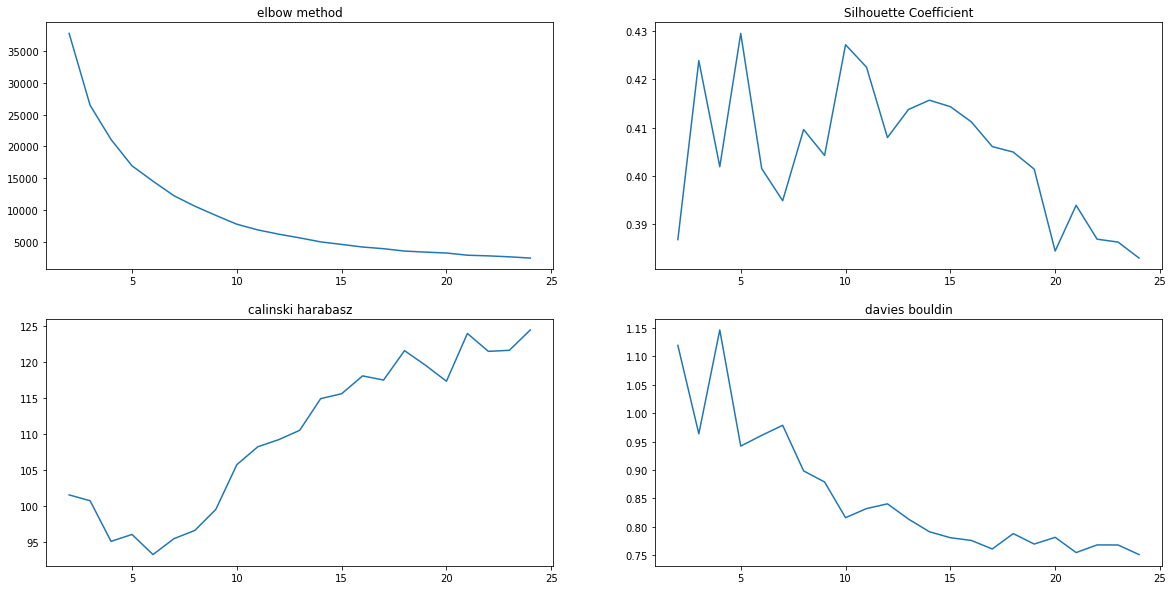

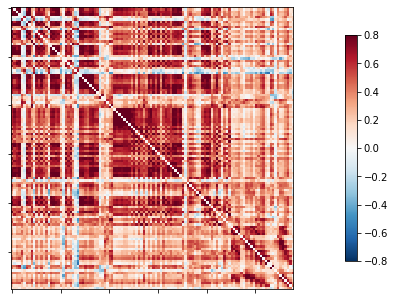

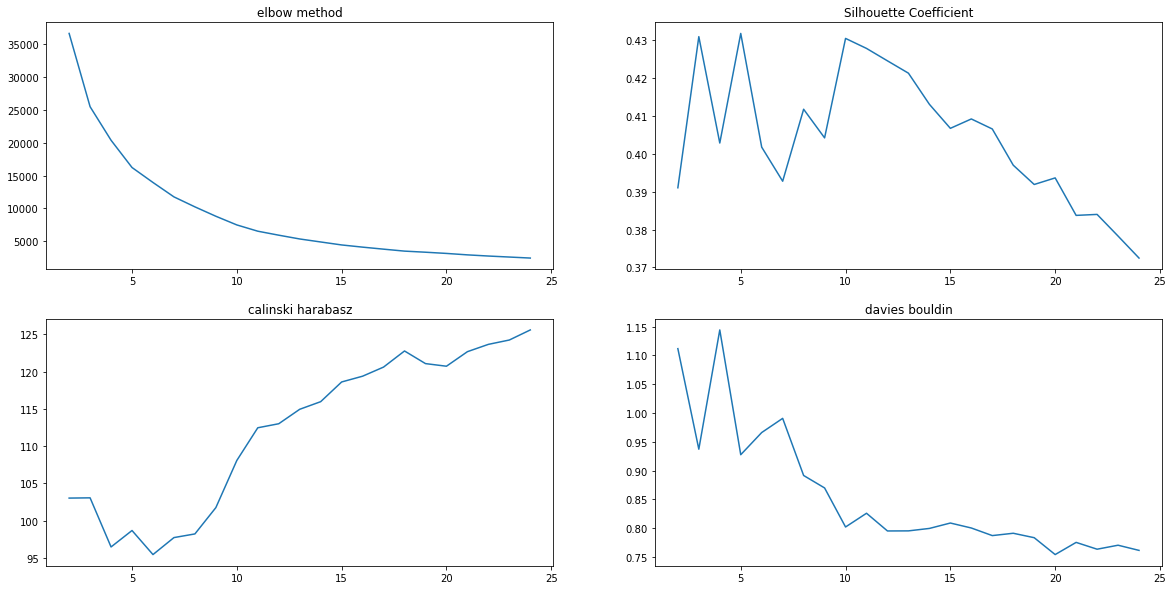

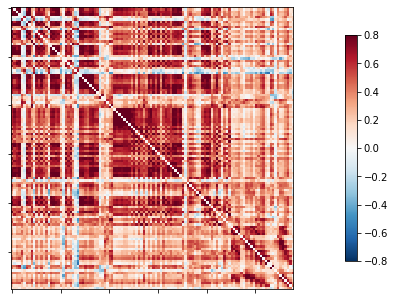

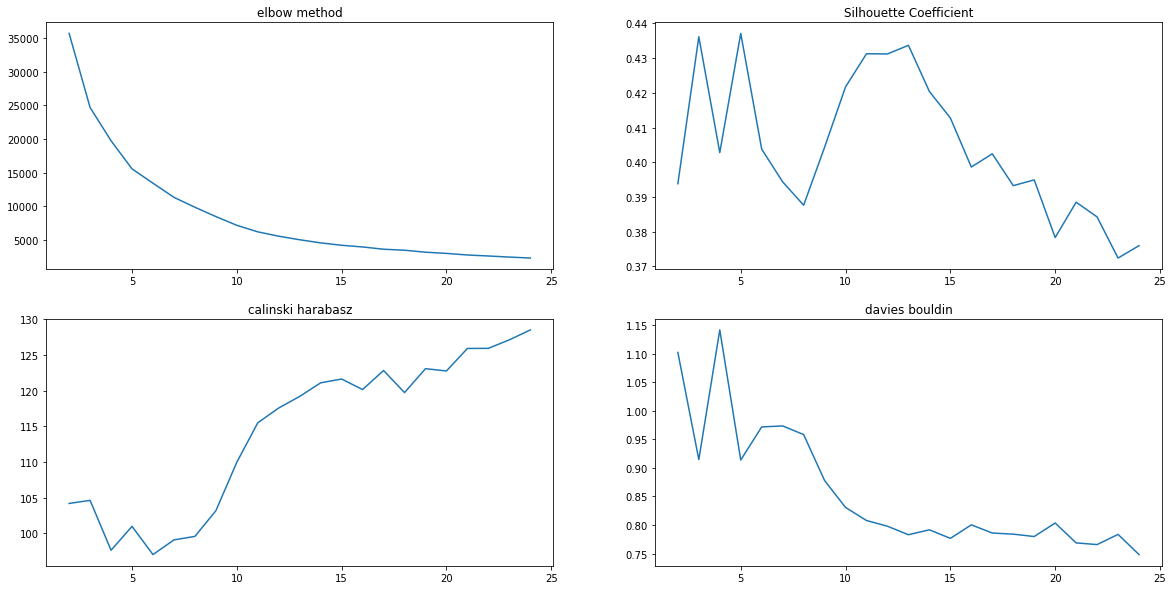

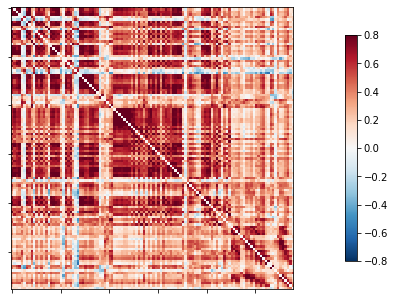

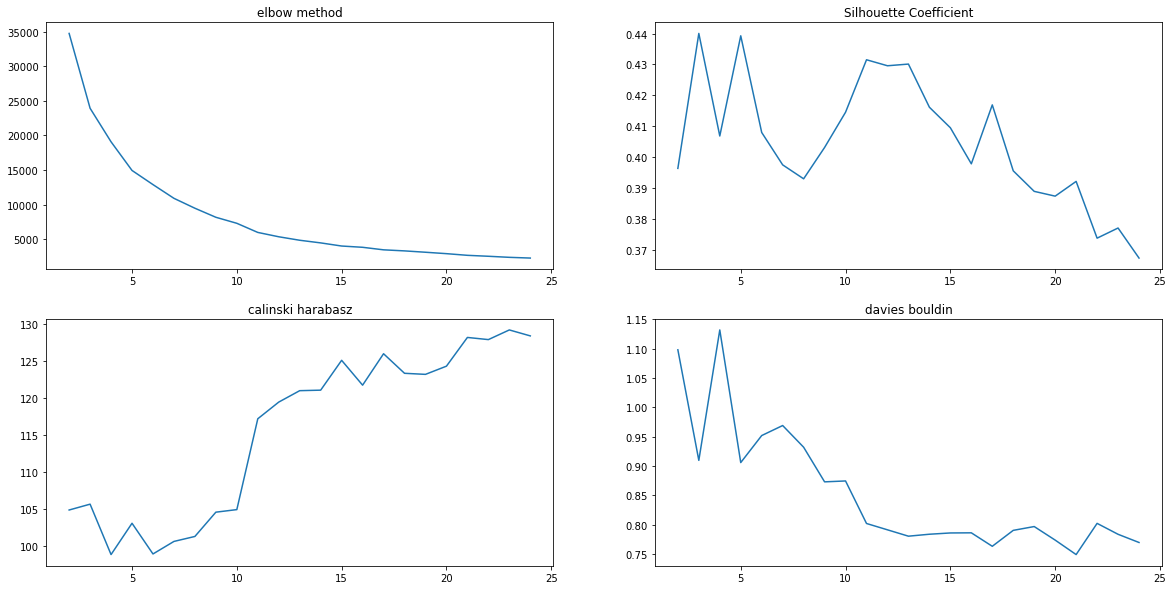

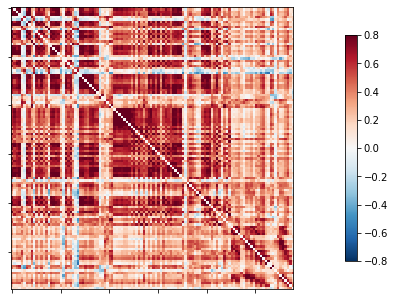

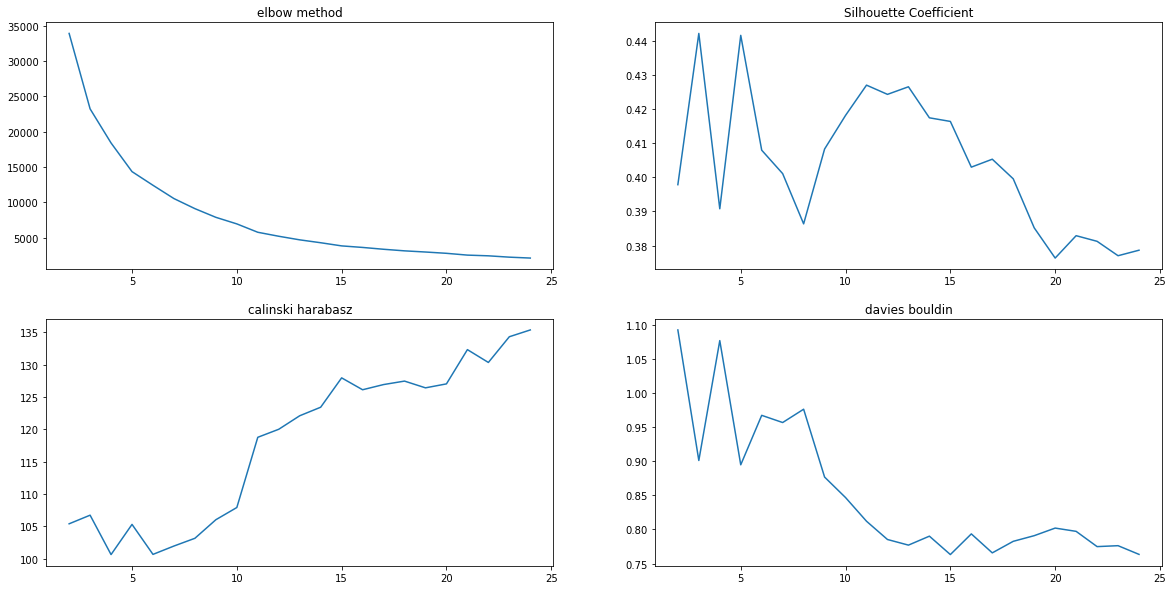

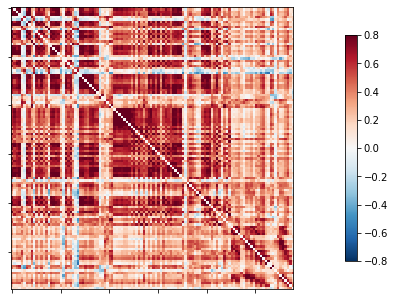

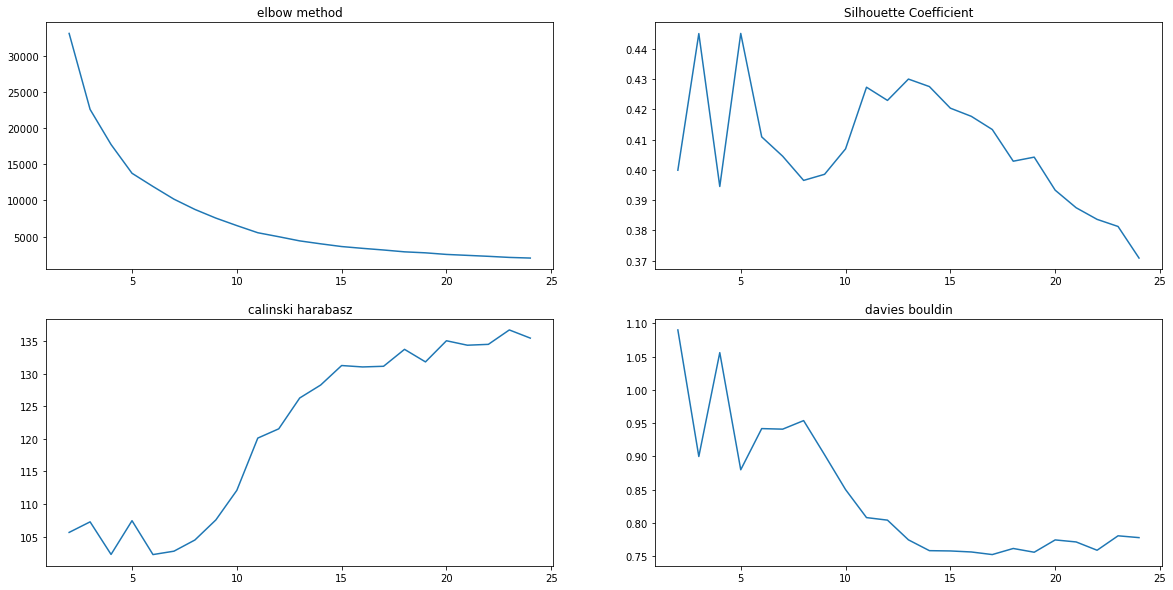

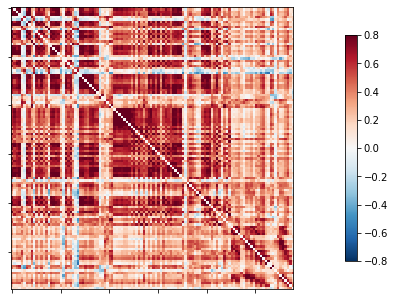

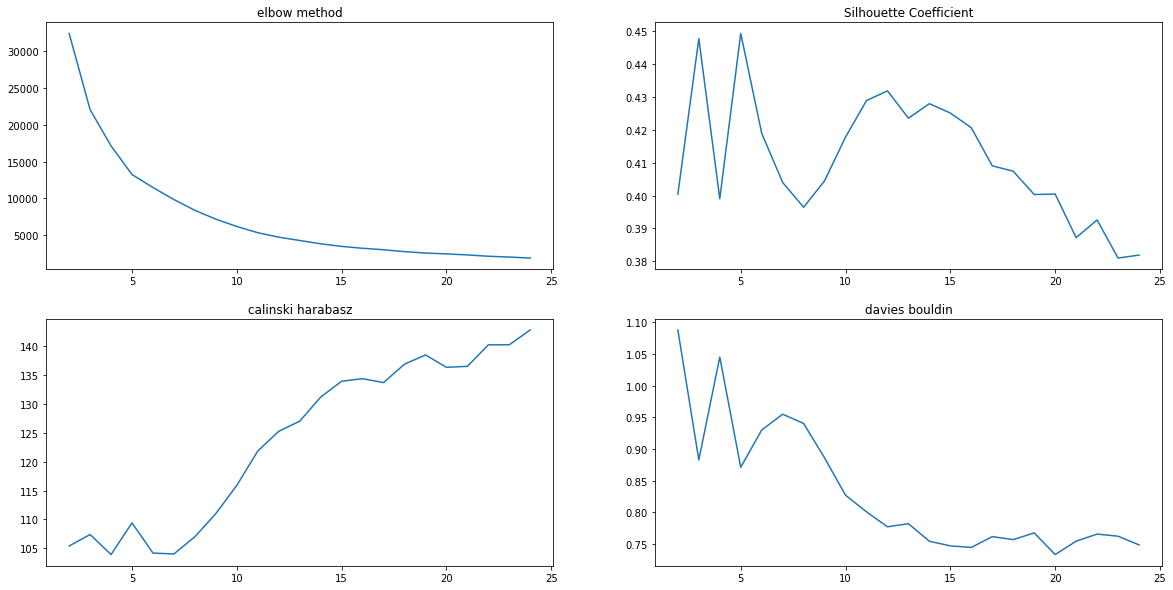

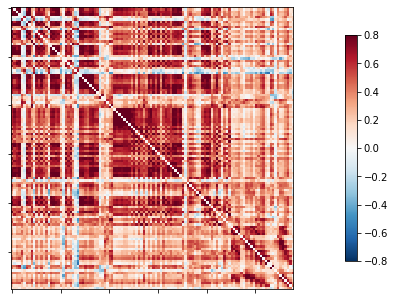

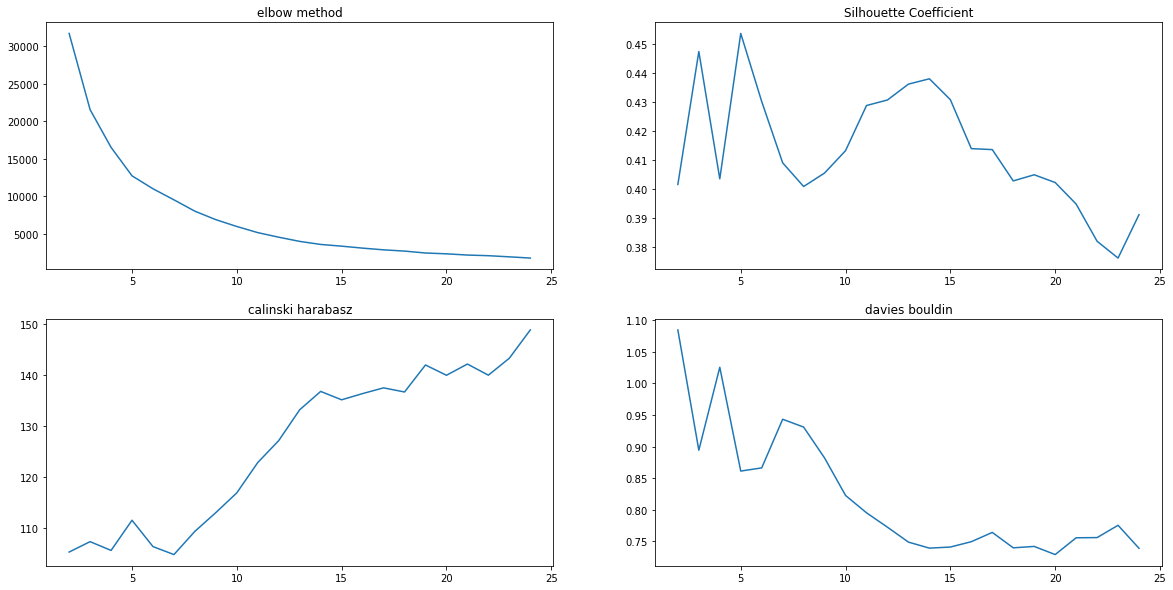

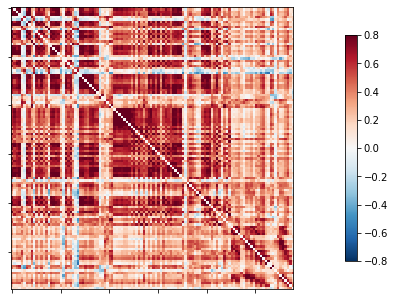

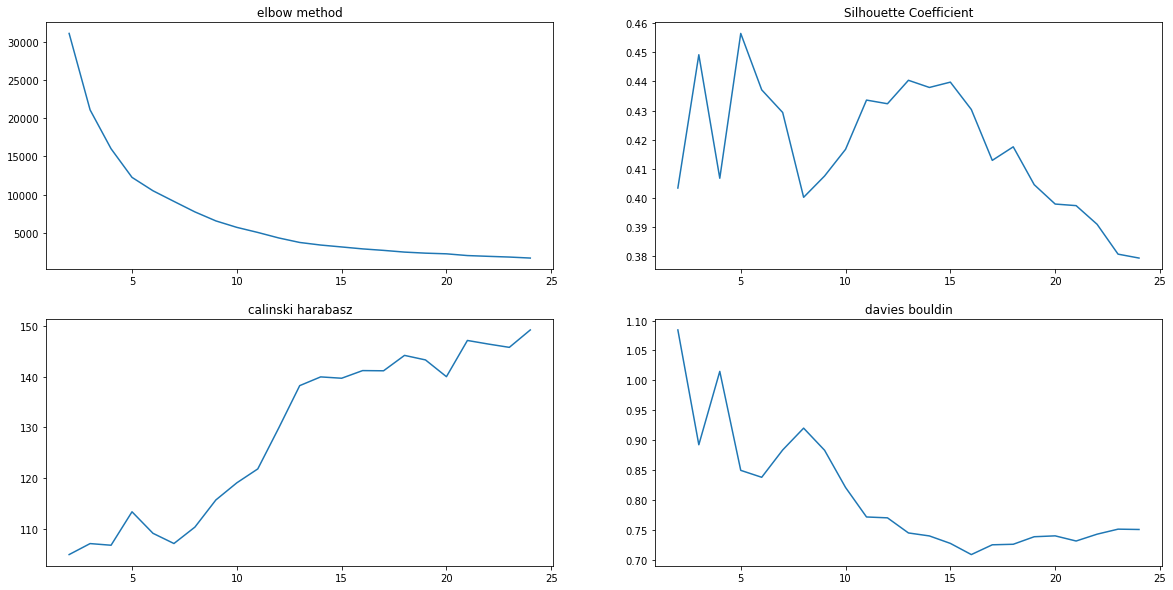

In [10]:
for window_length_TR in range(15, 50):

    windows = sliceWindows(time_series, window_length_TR, slidingSteps)
    print(len(windows))
    fcs = connectome.ConnectivityMeasure(kind="correlation").fit_transform(windows)
    # print(fcs.shape)
    # fc = connectome.ConnectivityMeasure(kind="correlation").fit_transform([time_series])[0]
    # print(fc.shape)

    # np.fill_diagonal(fc, 0)
    # fig_fc, ax_fc = plt.subplots()
    # fc_display = plotting.plot_matrix(fc, figure=fig_fc, colorbar=True, vmax=0.8, vmin=-0.8)
    # fig_fc.patch.set_color("white")

    inertias = []
    states_list = []
    scs = []
    chs = []
    dbs = []
    fcs2d = fcs.reshape((fcs.shape[0], 13456))
    for k in ks:
        center, states, inertia = cluster.k_means(fcs2d, k)
        states_list.append(states)
        inertias.append(inertia)
        scs.append(metrics.silhouette_score(fcs2d, states))
        chs.append(metrics.calinski_harabasz_score(fcs2d, states))
        dbs.append(metrics.davies_bouldin_score(fcs2d, states))
    figi, axi = plt.subplots(2, 2, figsize=(20, 10))
    figi.patch.set_color("white")
    axi[0, 0].set_title("elbow method")
    axi[0, 0].plot(ks, inertias)
    axi[0, 1].set_title("Silhouette Coefficient")
    axi[0, 1].plot(ks, scs)
    axi[1, 0].set_title("calinski harabasz")
    axi[1, 0].plot(ks, chs)
    axi[1, 1].set_title("davies bouldin")
    axi[1, 1].plot(ks, dbs)
    figi.savefig(f"cluster_evaluate/{window_length_TR}.png", format="png")

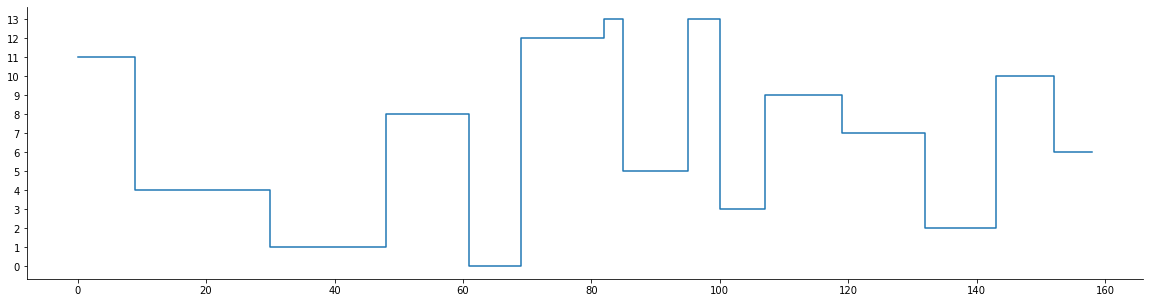

In [25]:
x = [0] * len(states) * 2
y = [0] * len(states) * 2
for i in range(1, len(states)):
    x[2*i-1] = x[2*i] = i
    y[2*i] = y[2*i+1] = states[i]


x[-1] = len(states)
y[0] = y[1] = states[0]
fig, ax = plt.subplots(figsize=(20, 5))
fig.patch.set_color("white")
# ax.tick_params(axis="x", colors="white")
# ax.tick_params(axis="y", colors="white")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.yaxis.set_major_formatter("{:>10d}")
ax.yaxis.set_major_locator(MaxNLocator(15, integer=True))
ax.plot(x,y)

In [15]:
preop_windows = []
postop_windows = []
for i, run in data["sub-292"]["ses-preop"].items():
    preop_windows += sliceWindows(run["time_series"], window_length_TR, slidingSteps)
for i, run in data["sub-292"]["ses-postop"].items():
    postop_windows += sliceWindows(run["time_series"], window_length_TR, slidingSteps)
print(len(preop_windows), len(postop_windows))

316 1160


In [16]:
preop_fcs = connectome.ConnectivityMeasure(kind="correlation").fit_transform(preop_windows)
postop_fcs = connectome.ConnectivityMeasure(kind="correlation").fit_transform(postop_windows)
print(preop_fcs.shape, postop_fcs.shape)
preop_fc = connectome.ConnectivityMeasure(kind="correlation").fit_transform([run["time_series"] for i, run in data["sub-292"]["ses-preop"].items()])
postop_fc = connectome.ConnectivityMeasure(kind="correlation").fit_transform([run["time_series"] for i, run in data["sub-292"]["ses-postop"].items()])
print(preop_fc.shape, postop_fc.shape)

(316, 116, 116) (1160, 116, 116)
(2, 116, 116) (5, 116, 116)


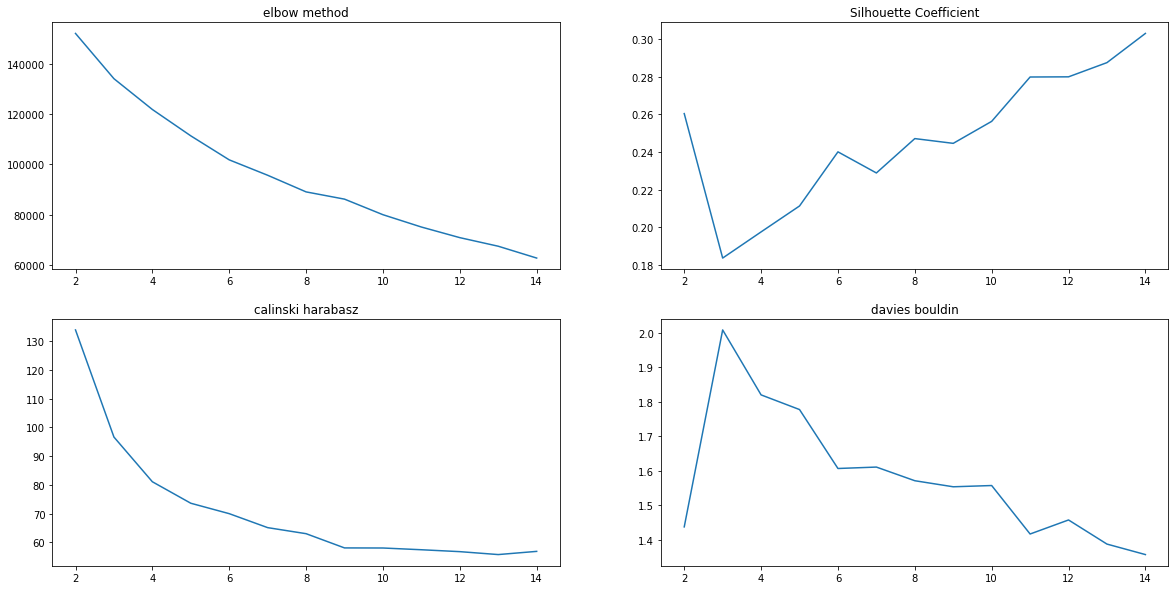

In [23]:
preop_inertias = []
preop_states_list = []
preop_scs = []
preop_chs = []
preop_dbs = []
preop_fcs2d = preop_fcs.reshape((preop_fcs.shape[0], 13456))
for k in ks:
    center, states, inertia = cluster.k_means(preop_fcs2d, k)
    preop_states_list.append(states)
    preop_inertias.append(inertia)
    preop_scs.append(metrics.silhouette_score(preop_fcs2d, states))
    preop_chs.append(metrics.calinski_harabasz_score(preop_fcs2d, states))
    preop_dbs.append(metrics.davies_bouldin_score(preop_fcs2d, states))
preop_figi, preop_axi = plt.subplots(2, 2, figsize=(20, 10))
preop_figi.patch.set_color("white")
preop_axi[0, 0].set_title("elbow method")
preop_axi[0, 0].plot(ks, preop_inertias)
preop_axi[0, 1].set_title("Silhouette Coefficient")
preop_axi[0, 1].plot(ks, preop_scs)
preop_axi[1, 0].set_title("calinski harabasz")
preop_axi[1, 0].plot(ks, preop_chs)
preop_axi[1, 1].set_title("davies bouldin")
preop_axi[1, 1].plot(ks, preop_dbs)

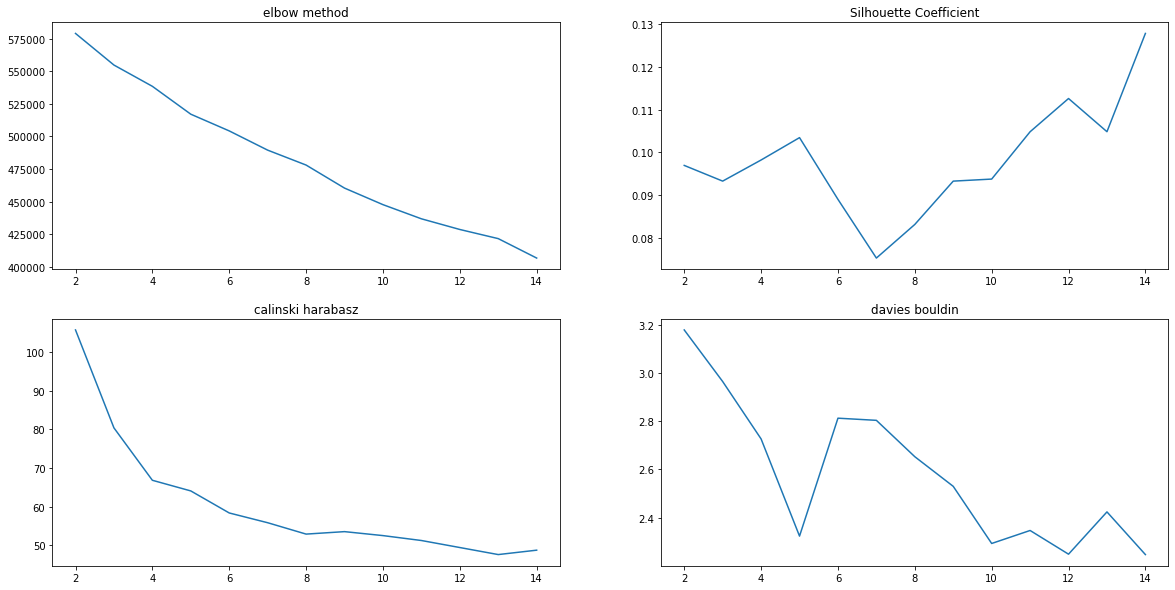

In [24]:
postop_inertias = []
postop_states_list = []
postop_scs = []
postop_chs = []
postop_dbs = []
postop_fcs2d = postop_fcs.reshape((postop_fcs.shape[0], 13456))
for k in ks:
    center, states, inertia = cluster.k_means(postop_fcs2d, k)
    postop_states_list.append(states)
    postop_inertias.append(inertia)
    postop_scs.append(metrics.silhouette_score(postop_fcs2d, states))
    postop_chs.append(metrics.calinski_harabasz_score(postop_fcs2d, states))
    postop_dbs.append(metrics.davies_bouldin_score(postop_fcs2d, states))
postop_figi, postop_axi = plt.subplots(2, 2, figsize=(20, 10))
postop_figi.patch.set_color("white")
postop_axi[0, 0].set_title("elbow method")
postop_axi[0, 0].plot(ks, postop_inertias)
postop_axi[0, 1].set_title("Silhouette Coefficient")
postop_axi[0, 1].plot(ks, postop_scs)
postop_axi[1, 0].set_title("calinski harabasz")
postop_axi[1, 0].plot(ks, postop_chs)
postop_axi[1, 1].set_title("davies bouldin")
postop_axi[1, 1].plot(ks, postop_dbs)

In [25]:
fcs = np.vstack((preop_fcs, postop_fcs))
print(preop_fcs.shape, postop_fcs.shape, fcs.shape)

(316, 116, 116) (1160, 116, 116) (1476, 116, 116)


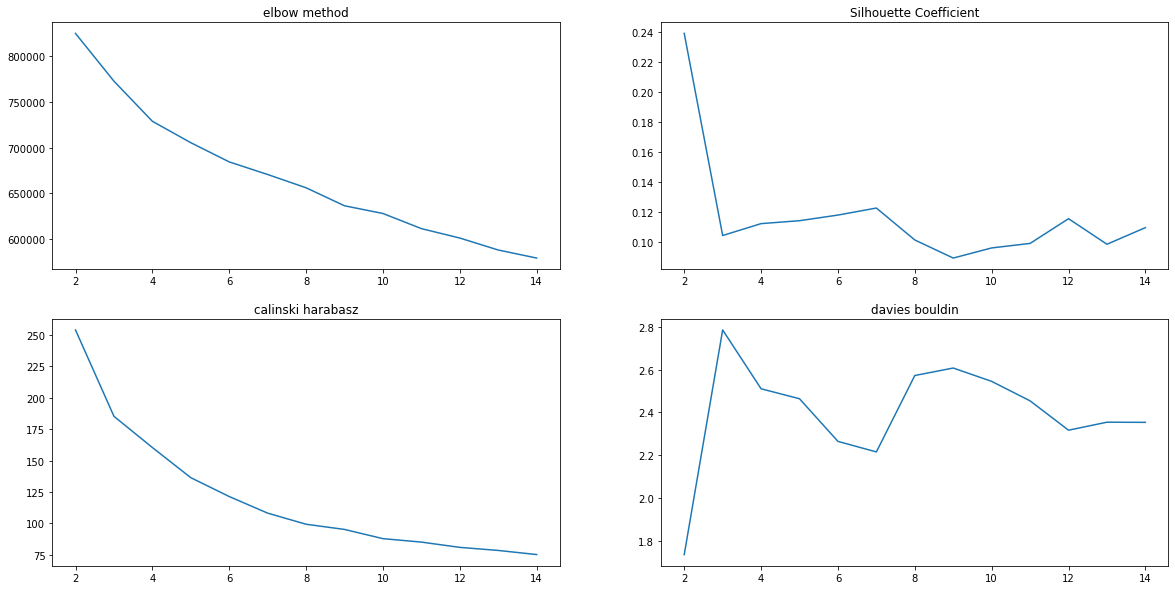

In [26]:
inertias = []
states_list = []
scs = []
chs = []
dbs = []
fcs2d = fcs.reshape((fcs.shape[0], 13456))
for k in ks:
    center, states, inertia = cluster.k_means(fcs2d, k)
    states_list.append(states)
    inertias.append(inertia)
    scs.append(metrics.silhouette_score(fcs2d, states))
    chs.append(metrics.calinski_harabasz_score(fcs2d, states))
    dbs.append(metrics.davies_bouldin_score(fcs2d, states))
figi, axi = plt.subplots(2, 2, figsize=(20, 10))
figi.patch.set_color("white")
axi[0, 0].set_title("elbow method")
axi[0, 0].plot(ks, inertias)
axi[0, 1].set_title("Silhouette Coefficient")
axi[0, 1].plot(ks, scs)
axi[1, 0].set_title("calinski harabasz")
axi[1, 0].plot(ks, chs)
axi[1, 1].set_title("davies bouldin")
axi[1, 1].plot(ks, dbs)

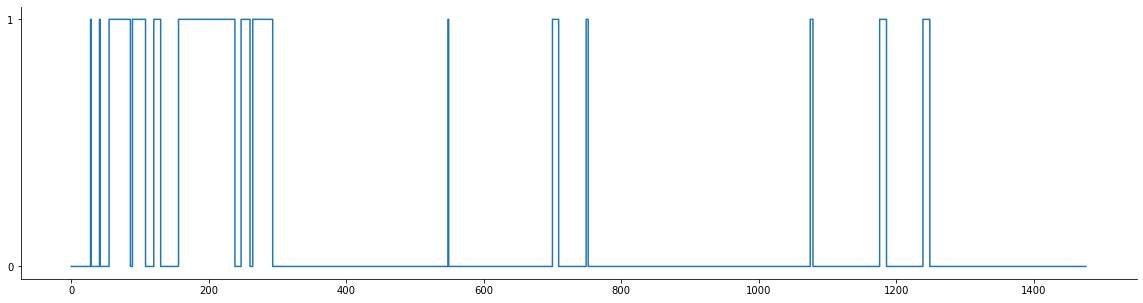

In [27]:
states = states_list[0]
x = [0] * len(states) * 2
y = [0] * len(states) * 2
for i in range(1, len(states)):
    x[2*i-1] = x[2*i] = i
    y[2*i] = y[2*i+1] = states[i]


x[-1] = len(states)
y[0] = y[1] = states[0]
fig, ax = plt.subplots(figsize=(20, 5))
fig.patch.set_color("white")
# ax.tick_params(axis="x", colors="white")
# ax.tick_params(axis="y", colors="white")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.yaxis.set_major_formatter("{:>10d}")
ax.yaxis.set_major_locator(MaxNLocator(15, integer=True))
ax.plot(x,y)